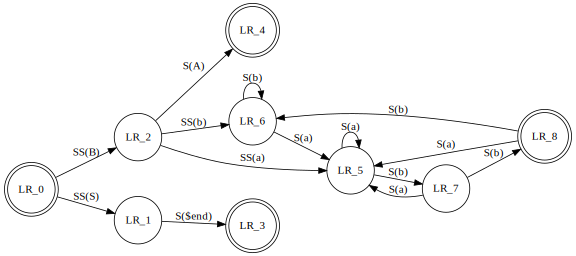

In [2]:
from graphviz import Digraph

f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f

In [4]:
import stanfordnlp
model_dir='/pi/ai/corenlp'
nlp_ja = stanfordnlp.Pipeline(models_dir=model_dir, 
                              lang='ja',
                              treebank='ja_gsd')

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd_tokenizer.pt', 'lang': 'ja', 'shorthand': 'ja_gsd', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd_tagger.pt', 'pretrain_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd.pretrain.pt', 'lang': 'ja', 'shorthand': 'ja_gsd', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd_lemmatizer.pt', 'lang': 'ja', 'shorthand': 'ja_gsd', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd_parser.pt', 'pretrain_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd.pretrain.pt', 'lang': 'ja', 'shorthand': 'ja_gsd', 'mode': 'predict'}
Done loading processors!
---


text: 私 	lemma: 私	upos: PRON	xpos: _
text: は 	lemma: は	upos: ADP	xpos: _
text: 中学生 	lemma: 中学生	upos: NOUN	xpos: _
text: です 	lemma: だ	upos: AUX	xpos: _
text: 。 	lemma: 。	upos: PUNCT	xpos: _
('私', '3', 'nsubj')
('は', '1', 'case')
('中学生', '0', 'root')
('です', '3', 'cop')
('。', '3', 'punct')


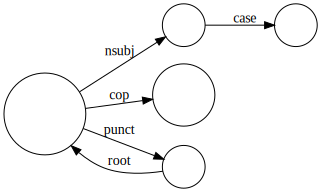

In [12]:
def print_dependencies(doc, f, segs, file=None):
    for dep_edge in doc.dependencies:
        print((dep_edge[2].text, dep_edge[0].index, dep_edge[1]), file=file)
        # head=int(dep_edge[0].index)
        # governor-id is index in words list + 1
        head=int(dep_edge[0].index)-1
        f.edge(segs[head], dep_edge[2].text, label=dep_edge[1])
            
def analyse(sents, nlp, f):
    segs=[]
    doc = nlp(sents)
    print(*[f'text: {word.text+" "}\tlemma: {word.lemma}\tupos: {word.upos}\txpos: {word.xpos}' for sent in doc.sentences for word in sent.words], sep='\n')
    for word in doc.sentences[0].words:        
        f.node(word.text)        
        segs.append(word.text)
    print_dependencies(doc.sentences[0], f, segs)

f = Digraph('deps', filename='deps.gv')
f.attr(rankdir='LR', size='8,5')
f.attr('node', shape='circle')
sents='私は中学生です。'
analyse(sents, nlp_ja, f)
f